In [19]:
from interpretable_ml_kit import get_german_credit_data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, roc_curve, roc_auc_score

# Import, Preprocess, and Explore the German Credit Dataset

In [4]:
germanCreditData = get_german_credit_data()
germanCreditData.shape

(1000, 54)

In [6]:
germanCreditData.isna().sum().sum()

0

In [7]:
germanCreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   creditDuration             1000 non-null   int64 
 1   creditAmount               1000 non-null   int64 
 2   installmentRate            1000 non-null   int64 
 3   residenceTime              1000 non-null   int64 
 4   Age                        1000 non-null   int64 
 5   numberOfCredit             1000 non-null   int64 
 6   NumberLiablePeople         1000 non-null   int64 
 7   creditRisk                 1000 non-null   int64 
 8   accountStatus_1            1000 non-null   uint8 
 9   creditHistory_A30          1000 non-null   uint8 
 10  creditHistory_A31          1000 non-null   uint8 
 11  creditHistory_A32          1000 non-null   uint8 
 12  creditHistory_A33          1000 non-null   uint8 
 13  creditHistory_A34          1000 non-null   uint8 
 14  Purpose_A

In [5]:
germanCreditData.head()

,creditDuration,creditAmount,installmentRate,residenceTime,Age,numberOfCredit,NumberLiablePeople,creditRisk,accountStatus_1,creditHistory_A30,creditHistory_A31,creditHistory_A32,creditHistory_A33,creditHistory_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_A61,Savings_A62,Savings_A63,Savings_A64,Savings_A65,employmentDuration_A71,employmentDuration_A72,employmentDuration_A73,employmentDuration_A74,employmentDuration_A75,Guarantor_A101,Guarantor_A102,Guarantor_A103,Property_A121,Property_A122,Property_A123,Property_A124,otherInstallmentPlan_A141,otherInstallmentPlan_A142,otherInstallmentPlan_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone,foreignWorker_A201,gender
0,6,1169,4,4,67,2,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1
2,12,2096,2,3,49,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0
4,24,4870,3,4,53,2,2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0


# Decision Tree as a Benchmark

#### Get Features & Response Variable

In [8]:
x = germanCreditData.drop(["creditRisk"], axis=1)
y = germanCreditData["creditRisk"]

#### Fit the Model

In [10]:
model_fit = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', 
                                   max_depth=8, max_features='auto', max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, 
                                   min_samples_leaf=9, min_samples_split=9,
                                   min_weight_fraction_leaf=0.0, 
                                   # presort='deprecated',
                                   random_state=42, splitter='best').fit(x, y)

#### Make Predictions

In [11]:
predictions = model_fit.predict(x)
predictionTree = predictions.copy()

In [14]:
proba_Tree = []

for probs in model_fit.predict_proba(x):
    proba_Tree.append(probs[1])
    
proba_Tree = pd.DataFrame([proba_Tree]).transpose()
proba_Tree.columns= ["S"]

#### Compute Accuracy & AUC

In [17]:
confusion_matrix(y,predictionTree)

sumDiagonal=0
for j in range(0,2):
    sumDiagonal += confusion_matrix(y,predictionTree)[j][j]

accuracy = round( (sumDiagonal / proba_Tree.shape[0])*100,2)
print("Accuracy Rate:", accuracy, "%")

Accuracy Rate: 75.7 %


In [18]:
AUCTree = roc_auc_score(y,proba_Tree)
print("AUC :", round(AUCTree, 4))

AUC : 0.8032


#### Feature Sorted by Importance

In [20]:
features_importance = zip(x.columns, model_fit.feature_importances_)
features_importance = sorted(features_importance, key = lambda x: x[1], reverse=True)

In [25]:
for feature, score in features_importance:
    print(f"Feature: {feature:<30} Score: {score:.5f}")

Feature: creditDuration                 Score: 0.20970
Feature: accountStatus_1                Score: 0.19910
Feature: Savings_A61                    Score: 0.12665
Feature: Telephone                      Score: 0.07766
Feature: Property_A121                  Score: 0.05002
Feature: Age                            Score: 0.04447
Feature: creditHistory_A31              Score: 0.04265
Feature: installmentRate                Score: 0.02927
Feature: Purpose_A40                    Score: 0.02511
Feature: Savings_A64                    Score: 0.02497
Feature: Guarantor_A103                 Score: 0.02014
Feature: Job_A173                       Score: 0.01943
Feature: NumberLiablePeople             Score: 0.01608
Feature: Property_A123                  Score: 0.01529
Feature: employmentDuration_A72         Score: 0.01327
Feature: creditAmount                   Score: 0.01203
Feature: gender                         Score: 0.01121
Feature: creditHistory_A32              Score: 0.00913
Feature: H

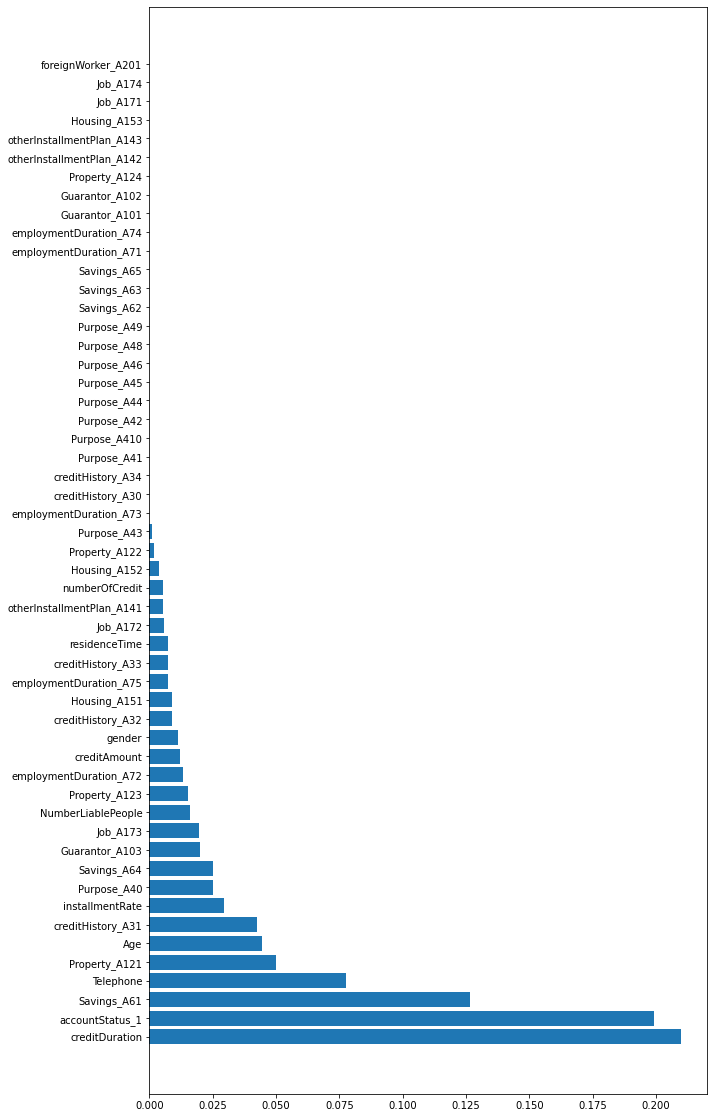

In [30]:
plt.rcParams['figure.figsize'] = [10, 20]

features, importance_score = zip(*features_importance)

plt.barh(features, importance_score)
plt.show()